In [22]:
import numpy as np
from keras.models import model_from_json
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

base_path = "C:/Users/user/Desktop/Report";

In [6]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)

# load weights into new model
model.load_weights("model.h5")

In [34]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

# Preprocess all test images
test_generator = test_data_gen.flow_from_directory(base_path + '/test', target_size=(48, 48), batch_size=64, color_mode="grayscale", class_mode='categorical', shuffle = False)

# do prediction on test data
pred = model.predict(test_generator)

Found 7178 images belonging to 7 classes.
113/113 [==============================] - 7s 66ms/step


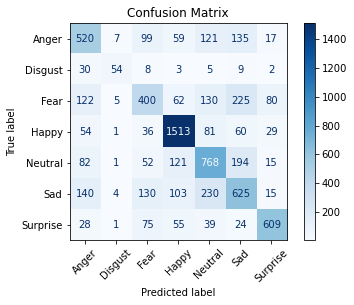

In [38]:
emotions = {0: "Anger", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprise"}

confusionMatrix = confusion_matrix(test_generator.classes, pred.argmax(axis=1))
cm = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=emotions.values())

cm.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title("Confusion Matrix")
plt.show()